IMPORT RELEVENT LIBRARIES

In [730]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [731]:
raw_data = pd.read_csv('tit_train.csv')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


DATA CLEANING

First, let check where the null values lies.

In [732]:
raw_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are null values in 'Age', 'Cabin', and 'Embarked'. Let's fill the null values one by one.

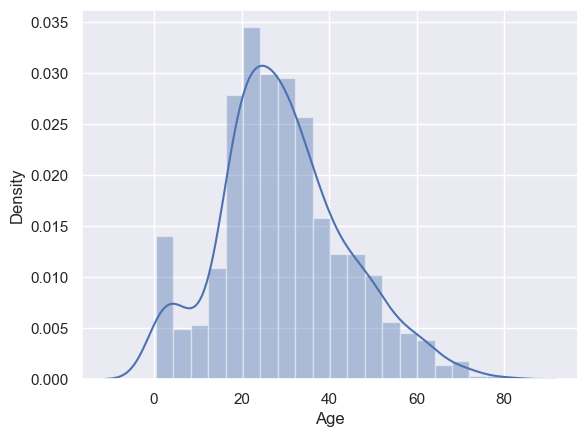

In [733]:
sns.distplot(raw_data['Age'])
plt.show()

In [734]:
raw_data['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [735]:
raw_data['Age'] = raw_data['Age'].fillna(24.0)
#it fills the null values in Age with 24.
#we choose 24 as it is most frequently occurred.

In [736]:
raw_data['Age'].isnull().sum()

0

Let's remove the outliers in 'Age' if any.

In [737]:
q = raw_data['Age'].quantile(0.99)
raw_data = raw_data[raw_data['Age']<q]

In [738]:
raw_data['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
E101           3
F33            3
              ..
C32            1
E34            1
C7             1
C54            1
C148           1
Name: count, Length: 143, dtype: int64

In [739]:
raw_data['Cabin'].isnull().sum()

681

Since, the null values in feature 'Cabin' is more than 50%, we can remove this feature as it is not useful.

In [740]:
raw_data = raw_data.drop(['Cabin'], axis=1)

In [741]:
raw_data['Embarked'].value_counts()

Embarked
S    638
C    165
Q     75
Name: count, dtype: int64

Let's see the distribution of 'Embarked' along survival.

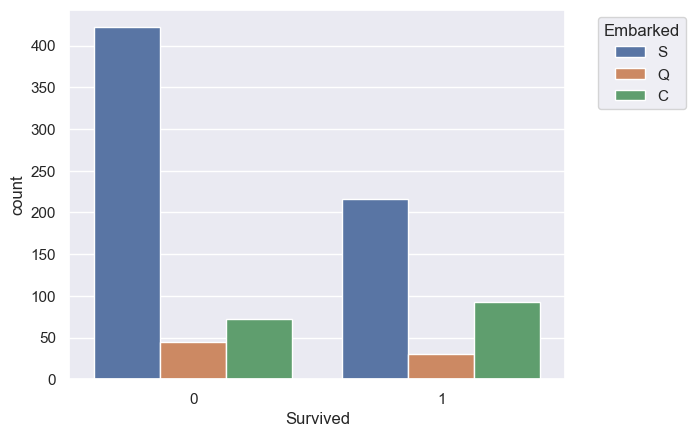

In [742]:
sns.countplot(x = 'Survived', hue = 'Embarked', data = raw_data)
plt.legend(title='Embarked', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [743]:
raw_data['Embarked'] = raw_data['Embarked'].fillna('S')
#Since most of the Embarked value is S in both those who are survived and those who are not, we can fill the null values with 'S'.

Let's confirm if there any null values in dataset.

In [744]:
raw_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [745]:
raw_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,880.000000,880.000000,880.000000,880,880,880.000000,880.000000,880.000000,880,880.000000,880
unique,NaN,NaN,NaN,880,2,NaN,NaN,NaN,671,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,566,NaN,NaN,NaN,7,NaN,640
mean,446.532955,0.387500,2.315909,NaN,NaN,28.051898,0.528409,0.384091,NaN,32.245439,NaN
std,256.923323,0.487456,0.833170,NaN,NaN,12.436155,1.108089,0.809624,NaN,49.941132,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,224.750000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.917700,NaN
50%,445.500000,0.000000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.250000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


DATA PREPROCESSING

In [746]:
cleaned_data = raw_data.copy()
cleaned_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Since, PassengerId and Name cannot give any useful insights about survival, we can remove them.

In [747]:
cleaned_data = cleaned_data.drop(['PassengerId','Name'], axis=1)
cleaned_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


We can make dummies of the features that are categorial and useful.

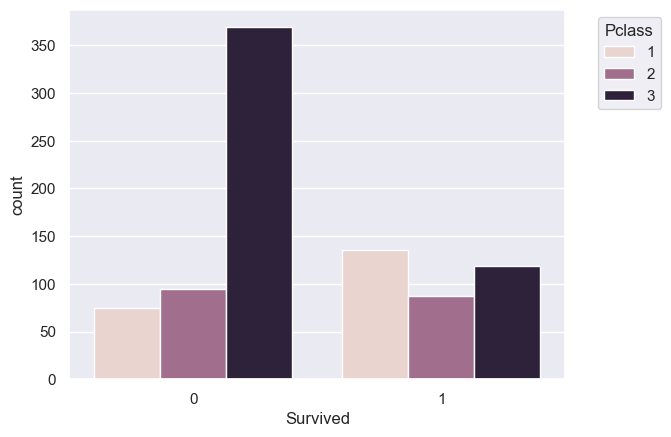

In [748]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = cleaned_data)
plt.legend(title = 'Pclass', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

In [749]:
pclass = pd.get_dummies(cleaned_data['Pclass'], drop_first=True).astype(int)
pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [750]:
cleaned_data = pd.concat([cleaned_data, pclass], axis=1)
cleaned_data = cleaned_data.drop(['Pclass'], axis=1)
cleaned_data.head()

,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3
0,0,male,22.0,1,0,A/5 21171,7.2500,S,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C,0,0
2,1,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,1,female,35.0,1,0,113803,53.1000,S,0,0
4,0,male,35.0,0,0,373450,8.0500,S,0,1


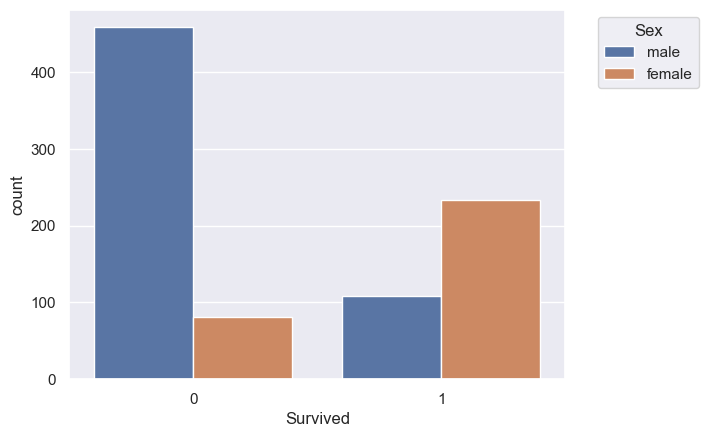

In [751]:
sns.countplot(x = 'Survived', hue = 'Sex', data = cleaned_data)
plt.legend(title = 'Sex', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

Let's convert male into value 1 and female into value 0.

In [752]:
cleaned_data['Sex'] = cleaned_data['Sex'].map({'male': 1, 'female': 0})
cleaned_data.head()

,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3
0,0,1,22.0,1,0,A/5 21171,7.2500,S,0,1
1,1,0,38.0,1,0,PC 17599,71.2833,C,0,0
2,1,0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,1,0,35.0,1,0,113803,53.1000,S,0,0
4,0,1,35.0,0,0,373450,8.0500,S,0,1


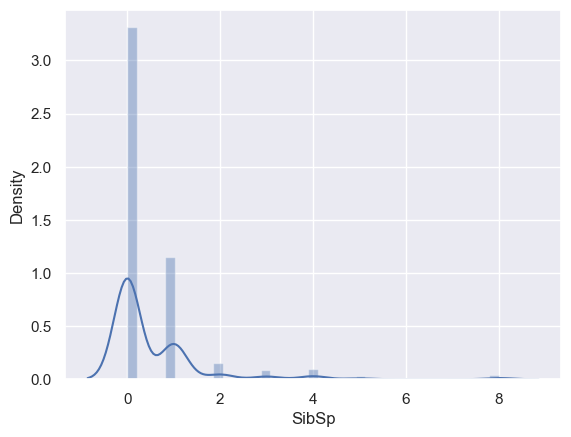

In [753]:
sns.distplot(cleaned_data['SibSp'])
plt.show()

As we can see from the graph, there are some outliers. Let's remove them.

In [754]:
q = cleaned_data['SibSp'].quantile(0.99)
cleaned_data = cleaned_data[cleaned_data['SibSp']<q]

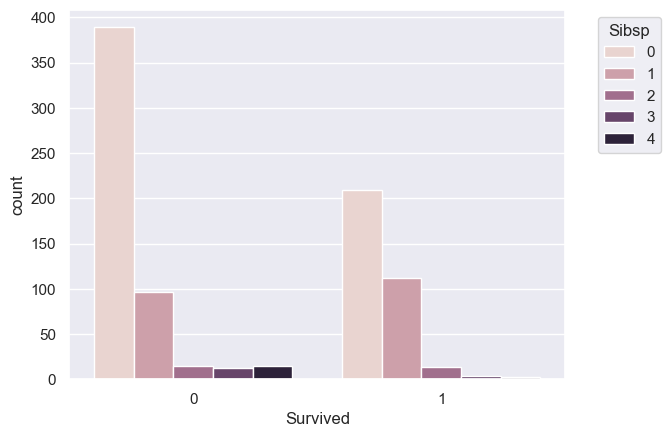

In [755]:
sns.countplot(x = 'Survived', hue = 'SibSp', data = cleaned_data)
plt.legend(title = 'Sibsp', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

As we can see from the graph, the people with SibSp more than 2 are rarely survived. So we can group values above 2.

In [756]:
sibsp_group_count = cleaned_data.groupby(cleaned_data['Survived'])['SibSp'].value_counts().unstack()
pd.set_option('display.max_columns', None)
sibsp_group_count

SibSp,0,1,2,3,4
Survived,,,,,
0,389,96,15,12,15
1,209,112,13,4,3


In [757]:
sibsp = pd.get_dummies(cleaned_data['SibSp'], drop_first=True).astype(int)
sibsp

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,0,0,0,0
3,1,0,0,0
4,0,0,0,0
...,...,...,...,...
886,0,0,0,0
887,0,0,0,0
888,1,0,0,0
889,0,0,0,0


In [758]:
sibsp_above_2 = sibsp.loc[:, 3:].max(axis=1)
sibsp_1 = sibsp.loc[:, [1]].max(axis=1)
sibsp_2 = sibsp.loc[:, [2]].max(axis=1)

In [759]:
cleaned_data = pd.concat([cleaned_data, sibsp_1, sibsp_2, sibsp_above_2], axis=1)
cleaned_data = cleaned_data.drop(['SibSp'], axis=1)
cleaned_data.head()

,Survived,Sex,Age,Parch,Ticket,Fare,Embarked,2,3,0,1,2
0,0,1,22.0,0,A/5 21171,7.2500,S,0,1,1,0,0
1,1,0,38.0,0,PC 17599,71.2833,C,0,0,1,0,0
2,1,0,26.0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,0
3,1,0,35.0,0,113803,53.1000,S,0,0,1,0,0
4,0,1,35.0,0,373450,8.0500,S,0,1,0,0,0


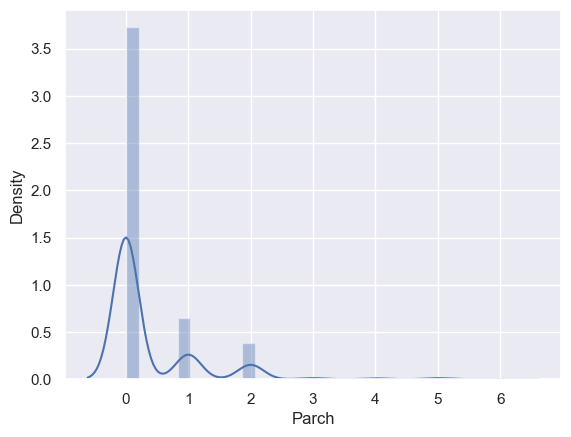

In [760]:
sns.distplot(cleaned_data['Parch'])
plt.show()

As from the graph, there are some outliers. So let's remove them.

In [761]:
q = cleaned_data['Parch'].quantile(0.99)
cleaned_data = cleaned_data[cleaned_data['Parch']<q]

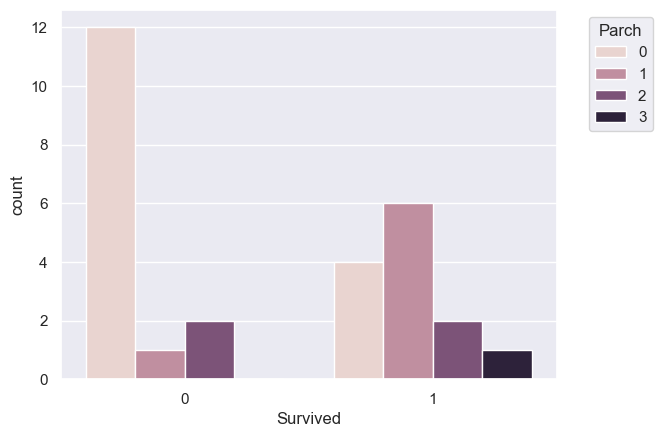

In [762]:
sns.countplot(x = 'Survived', hue = 'Parch', data = cleaned_data)
plt.legend(title = 'Parch', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

In [763]:
parch = pd.get_dummies(cleaned_data['Parch'], drop_first=True).astype(int)
parch

,1,2,3
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
886,0,0,0
887,0,0,0
888,0,1,0
889,0,0,0


In [764]:
cleaned_data = pd.concat([cleaned_data, parch], axis=1)
cleaned_data = cleaned_data.drop(['Parch'], axis=1)
cleaned_data.head()

,Survived,Sex,Age,Ticket,Fare,Embarked,2,3,0,1,2,1,2,3
0,0,1,22.0,A/5 21171,7.2500,S,0,1,1,0,0,0,0,0
1,1,0,38.0,PC 17599,71.2833,C,0,0,1,0,0,0,0,0
2,1,0,26.0,STON/O2. 3101282,7.9250,S,0,1,0,0,0,0,0,0
3,1,0,35.0,113803,53.1000,S,0,0,1,0,0,0,0,0
4,0,1,35.0,373450,8.0500,S,0,1,0,0,0,0,0,0


In [765]:
cleaned_data = cleaned_data.drop(['Ticket'], axis=1)
cleaned_data.head()

,Survived,Sex,Age,Fare,Embarked,2,3,0,1,2,1,2,3
0,0,1,22.0,7.2500,S,0,1,1,0,0,0,0,0
1,1,0,38.0,71.2833,C,0,0,1,0,0,0,0,0
2,1,0,26.0,7.9250,S,0,1,0,0,0,0,0,0
3,1,0,35.0,53.1000,S,0,0,1,0,0,0,0,0
4,0,1,35.0,8.0500,S,0,1,0,0,0,0,0,0


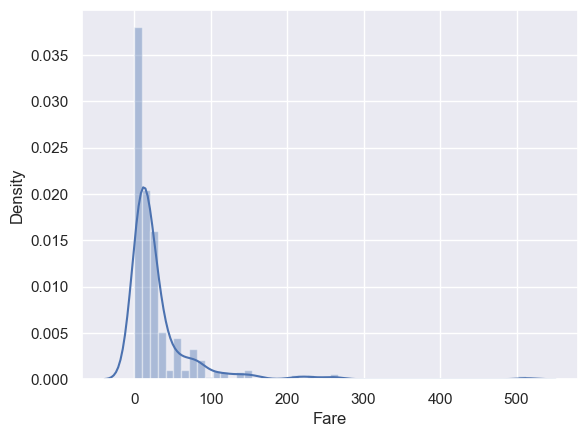

In [766]:
sns.distplot(cleaned_data['Fare'])
plt.show()

In [767]:
q = cleaned_data['Fare'].quantile(0.99)
cleaned_data = cleaned_data[cleaned_data['Fare']<q]

In [768]:
cleaned_data.head()

,Survived,Sex,Age,Fare,Embarked,2,3,0,1,2,1,2,3
0,0,1,22.0,7.2500,S,0,1,1,0,0,0,0,0
1,1,0,38.0,71.2833,C,0,0,1,0,0,0,0,0
2,1,0,26.0,7.9250,S,0,1,0,0,0,0,0,0
3,1,0,35.0,53.1000,S,0,0,1,0,0,0,0,0
4,0,1,35.0,8.0500,S,0,1,0,0,0,0,0,0


In [769]:
cleaned_data['Embarked'].value_counts()

Embarked
S    616
C    158
Q     74
Name: count, dtype: int64

In [770]:
embarked = pd.get_dummies(cleaned_data['Embarked'], drop_first=True).astype(int)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [771]:
cleaned_data = pd.concat([cleaned_data, embarked], axis=1)
cleaned_data = cleaned_data.drop(['Embarked'], axis=1)
cleaned_data.head()

,Survived,Sex,Age,Fare,2,3,0,1,2,1,2,3,Q,S
0,0,1,22.0,7.2500,0,1,1,0,0,0,0,0,0,1
1,1,0,38.0,71.2833,0,0,1,0,0,0,0,0,0,0
2,1,0,26.0,7.9250,0,1,0,0,0,0,0,0,0,1
3,1,0,35.0,53.1000,0,0,1,0,0,0,0,0,0,1
4,0,1,35.0,8.0500,0,1,0,0,0,0,0,0,0,1


In [772]:
cleaned_data.columns.values

array(['Survived', 'Sex', 'Age', 'Fare', 2, 3, 0, 1, 2, 1, 2, 3, 'Q', 'S'],
      dtype=object)

Rearranging and renaming the columns for better understanding.

In [773]:
column_name = ['Survived', 'Sex', 'Age', 'Fare', 'Pclass_2', 'Pclass_3', 'SibSp_1', 'SibSp_2', 'SibSp_above_2', 'Parch_1', 
               'Parch_2', 'Parch_3', 'Embarked_Q', 'Embarked_S']
cleaned_data.columns = column_name
col = ['Pclass_2', 'Pclass_3', 'Sex', 'Age', 'SibSp_1', 'SibSp_2', 'SibSp_above_2','Parch_1', 
               'Parch_2', 'Parch_3','Fare', 'Embarked_Q', 'Embarked_S', 'Survived']
cleaned_data = cleaned_data[col]
cleaned_data.head()

,Pclass_2,Pclass_3,Sex,Age,SibSp_1,SibSp_2,SibSp_above_2,Parch_1,Parch_2,Parch_3,Fare,Embarked_Q,Embarked_S,Survived
0,0,1,1,22.0,1,0,0,0,0,0,7.2500,0,1,0
1,0,0,0,38.0,1,0,0,0,0,0,71.2833,0,0,1
2,0,1,0,26.0,0,0,0,0,0,0,7.9250,0,1,1
3,0,0,0,35.0,1,0,0,0,0,0,53.1000,0,1,1
4,0,1,1,35.0,0,0,0,0,0,0,8.0500,0,1,0


In [774]:
preprocessed_data = cleaned_data.copy()

SCALING THE DATASET

In [775]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Since there are two features 'Age' and 'Fare' that are non-categorial. Therefore, we should scale these two columns only.

In [776]:
columns_to_scale = ['Age', 'Fare']
preprocessed_data[columns_to_scale] = scaler.fit_transform(preprocessed_data[columns_to_scale])
preprocessed_data = preprocessed_data.reset_index(drop=True)
preprocessed_data.head()

,Pclass_2,Pclass_3,Sex,Age,SibSp_1,SibSp_2,SibSp_above_2,Parch_1,Parch_2,Parch_3,Fare,Embarked_Q,Embarked_S,Survived
0,0,1,1,-0.485452,1,0,0,0,0,0,-0.586615,0,1,0
1,0,0,0,0.803849,1,0,0,0,0,0,1.222068,0,0,1
2,0,1,0,-0.163127,0,0,0,0,0,0,-0.567549,0,1,1
3,0,0,0,0.562105,1,0,0,0,0,0,0.708463,0,1,1
4,0,1,1,0.562105,0,0,0,0,0,0,-0.564018,0,1,0


INPUTS AND TARGETS

In [777]:
scaled_inputs = preprocessed_data.iloc[:, :-1]
scaled_targets = preprocessed_data.iloc[:, -1]

SHUFFLING THE DATASET

In [778]:
df_combined = pd.concat([scaled_inputs, preprocessed_data['Survived']], axis=1)
df_shuffled = df_combined.sample(frac=1, random_state=365)
shuffled_inputs = df_shuffled.drop(['Survived'], axis=1)
shuffled_targets = df_shuffled['Survived']

In [779]:
shuffled_inputs.shape

(848, 13)

NEURAL NETWORK MODEL

In [780]:
samples_count = shuffled_inputs.shape[0]
train_sample_count = int(0.8 * samples_count)
validation_sample_count = int(0.1 * samples_count)
test_sample_count = samples_count - train_sample_count - validation_sample_count

train_inputs = shuffled_inputs[: train_sample_count]
train_targets = shuffled_targets[: train_sample_count]

validation_inputs = shuffled_inputs[train_sample_count : train_sample_count + validation_sample_count]
validation_targets = shuffled_targets[train_sample_count : train_sample_count + validation_sample_count]

test_inputs = shuffled_inputs[train_sample_count + validation_sample_count :]
test_targets = shuffled_targets[train_sample_count + validation_sample_count :]

print(np.sum(train_targets) / train_sample_count)
print(np.sum(validation_targets) / validation_sample_count)
print(np.sum(test_targets) / test_sample_count)

0.39823008849557523
0.3333333333333333
0.3953488372093023


In [781]:
np.savez('titanic_train_data', inputs = train_inputs, targets = train_targets)
np.savez('titanic_validation_data', inputs = validation_inputs, targets = validation_targets)
np.savez('titanic_test_data', inputs = test_inputs, targets = test_targets)

In [782]:
npz = np.load('titanic_train_data.npz')
processed_train_inputs = npz['inputs'].astype(np.float32)
processed_train_targets = npz['targets'].astype(np.int64)

npz = np.load('titanic_validation_data.npz')
processed_validation_inputs = npz['inputs'].astype(np.float32)
processed_validation_targets = npz['targets'].astype(np.int64)

npz = np.load('titanic_test_data.npz')
processed_test_inputs = npz['inputs'].astype(np.float32)
processed_test_targets = npz['targets'].astype(np.int64)

In [783]:
processed_train_inputs.shape

(678, 13)

TRAINING THE MODEL

In [784]:
import tensorflow as tf
input_size = 13
output_size = 2
hidden_layer_size = 50
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax')
])

In [785]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate = 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [786]:
batchsize = 50
max_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)
model.fit(processed_train_inputs,
          processed_train_targets,
          batch_size = batchsize,
          epochs = max_epochs,
          callbacks = [early_stopping],
          validation_data = (processed_validation_inputs, processed_validation_targets),
          verbose = 2
          )

Epoch 1/100


14/14 - 2s - loss: 0.6560 - accuracy: 0.6445 - val_loss: 0.5933 - val_accuracy: 0.7143 - 2s/epoch - 159ms/step
Epoch 2/100
14/14 - 0s - loss: 0.5568 - accuracy: 0.7463 - val_loss: 0.5628 - val_accuracy: 0.7500 - 100ms/epoch - 7ms/step
Epoch 3/100
14/14 - 0s - loss: 0.4961 - accuracy: 0.7758 - val_loss: 0.5354 - val_accuracy: 0.7619 - 73ms/epoch - 5ms/step
Epoch 4/100
14/14 - 0s - loss: 0.4622 - accuracy: 0.8053 - val_loss: 0.5032 - val_accuracy: 0.7738 - 81ms/epoch - 6ms/step
Epoch 5/100
14/14 - 0s - loss: 0.4370 - accuracy: 0.8127 - val_loss: 0.5127 - val_accuracy: 0.7857 - 83ms/epoch - 6ms/step
Epoch 6/100
14/14 - 0s - loss: 0.4221 - accuracy: 0.8171 - val_loss: 0.5060 - val_accuracy: 0.8095 - 73ms/epoch - 5ms/step


TESTING THE MODEL

In [787]:
test_loss, test_accuracy = model.evaluate(processed_test_inputs, processed_test_targets)

3/3 [==============================] - 0s 4ms/step - loss: 0.4086 - accuracy: 0.8372


In [788]:
print('Test loss : {0:.2f}   Test accuracy : {1:.2f}%'.format(test_loss, test_accuracy*100))

Test loss : 0.41   Test accuracy : 83.72%


The accuracy of the model is obtained around 83-84%.

SAVING THE MODEL

In [791]:
import pickle

In [792]:
with open('model', 'wb') as file:
    pickle.dump(model, file)

In [793]:
with open('scaler', 'wb') as file:
    pickle.dump(scaler, file)